# **Flight Fare Prediction Project**

---




## **Introduction and Setup**



In [1]:
# Install necessary libraries
!pip install chart_studio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks
import ipywidgets
import chart_studio
import seaborn as sns

In [2]:
# Set Seaborn as default plotting style
sns.set()

# Load the training dataset
train_data = pd.read_csv("Train_Data.csv")
pd.set_option('display.max_columns', None)

## **Exploratory Data Analysis (EDA)**
---
### **Overview of the Dataset**



In [3]:
# Display the first few rows of the dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
3,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
4,SpiceJet,24-06-2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873


In [4]:
# Display information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6828 entries, 0 to 6827
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          6828 non-null   object
 1   Date_of_Journey  6828 non-null   object
 2   Source           6828 non-null   object
 3   Destination      6828 non-null   object
 4   Route            6827 non-null   object
 5   Dep_Time         6828 non-null   object
 6   Arrival_Time     6828 non-null   object
 7   Duration         6828 non-null   object
 8   Total_Stops      6827 non-null   object
 9   Additional_Info  6828 non-null   object
 10  Price            6828 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 586.9+ KB


In [5]:
train_data["Duration"].value_counts()

2h 50m     550
2h 35m     329
2h 45m     294
1h 30m     264
2h 55m     239
          ... 
21h 40m      1
25h          1
11h 25m      1
11h 55m      1
23h 45m      1
Name: Duration, Length: 310, dtype: int64

In [6]:
train_data.dropna(inplace = True)

In [7]:
# Check for missing values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### **Date of Journey**

In [8]:
# Convert 'Date_of_Journey' to timestamp
train_data["Journey_day"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d-%m-%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d-%m-%Y").dt.month

In [9]:
# Drop 'Date_of_Journey' as it is no longer needed
train_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [10]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
3,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6


### **Departure Time**

In [11]:
# Extract Hours and Minutes from 'Dep_Time'
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [12]:
# Drop 'Dep_Time' as it is no longer needed
train_data.drop(["Dep_Time"], axis=1, inplace=True)

In [13]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22-03-2022 01:10,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
3,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,11:25,2h 25m,non-stop,No info,3873,24,6,9,0


### **Arrival Time**

In [14]:
# Extract Hours and Minutes from 'Arrival_Time'
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

In [15]:
# Drop 'Arrival_Time' as it is no longer needed
train_data.drop(["Arrival_Time"], axis=1, inplace=True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
3,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25


### **Duration**

In [17]:
# Extract Hours and Minutes from 'Duration'
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [18]:
# Add new columns to the dataset and drop 'Duration'
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

train_data.drop(["Duration"], axis=1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
3,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25


# **Handling Categorical Data and Feature Engineering**

---
### **Airline Analysis**

### Box Plot: Airline vs Price



In [19]:
import chart_studio
import chart_studio.tools as tls

# Set your Plotly credentials
chart_studio.tools.set_credentials_file(username='siavashist', api_key='fEXyg9Nq79agmCm0PX9x')

In [20]:
train_data.pivot(columns='Airline', values='Price').iplot(
kind='box',
yTitle='Airline',
title='Airline by price')

In [21]:
# Display Airline value counts
train_data["Airline"].value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### One-Hot Encoding for Airline

In [22]:
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0


### Scatter Plot: Price vs Airline by Source

In [23]:
import plotly.express as px
fig = px.scatter(train_data, x="Price", y="Airline", color="Source")
fig.show()


### Histogram: Airline Distribution by Duration

In [24]:
train_data['Duration_hours'].iplot(kind='hist', xTitle='Airline', yTitle='Flight Duration',
                                   title='Airline Distribution by Duration')

### Interactive Bar Plot Dashboard

interactive(children=(Dropdown(description='col', options=('Source', 'Destination', 'Route', 'Total_Stops', 'A…

<function __main__.create_fare_plot(col=Index(['Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object'))>

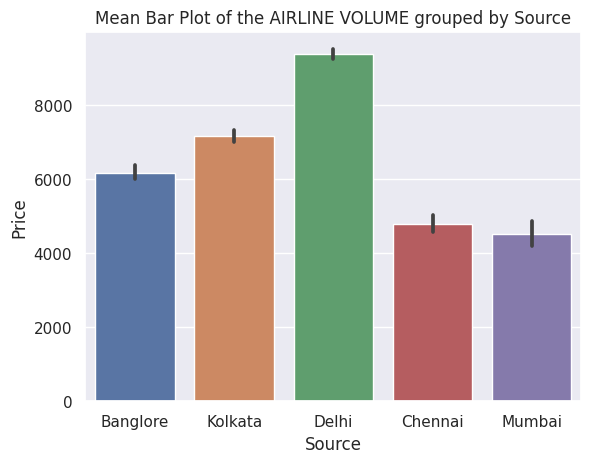

In [25]:
# Creating an interactive dashboard using ipywidgets
from ipywidgets import interact

def create_fare_plot(col=train_data.drop(['Price', 'Airline'], axis=1).columns):
    sns.barplot(data=train_data, x=col, y='Price')
    plt.title(f'Mean Bar Plot of the AIRLINE VOLUME grouped by {col}')

# Display interactive dashboard
interact(create_fare_plot)

### Boxen Plot: Airline vs Price

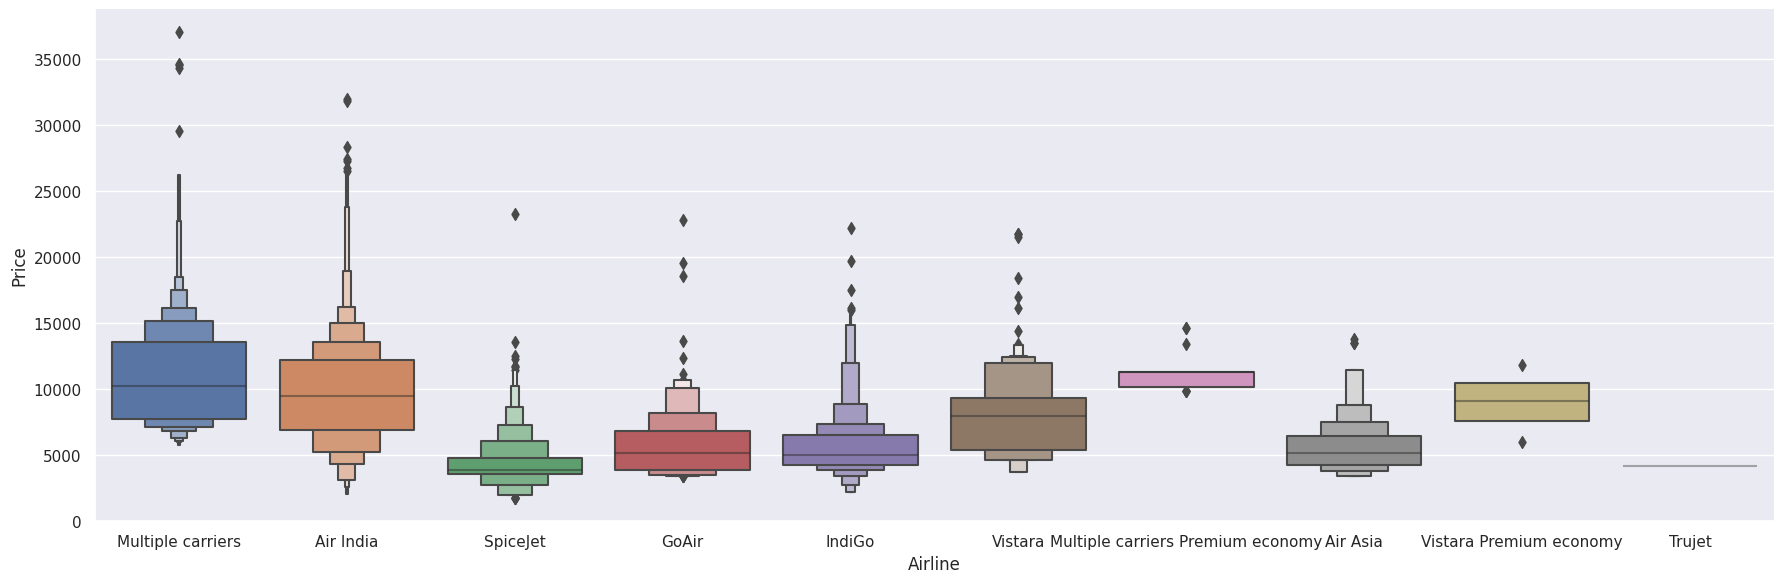

In [26]:
# Boxen Plot: Airline vs Price
sns.catplot(y="Price", x="Airline", data=train_data.sort_values("Price", ascending=False),
            kind="boxen", height=6, aspect=3)
plt.show()

### One-Hot Encoding for Airline (Again)

In [27]:
# As Airline is Nominal Categorical data, perform OneHotEncoding
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0


### Source Analysis

In [28]:
train_data["Source"].value_counts()

# Perform OneHotEncoding for Source
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,0
4,0,0,1,0


In [29]:
# Display Airline Source counts
train_data["Source"].value_counts()

Delhi       2948
Kolkata     1615
Banglore    1405
Mumbai       478
Chennai      381
Name: Source, dtype: int64

### Destination Analysis

In [30]:
train_data["Destination"].value_counts()

# Perform OneHotEncoding for Destination
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,0


In [31]:
# Display Airline Destination counts
train_data["Destination"].value_counts()

Cochin       2948
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

### Feature Engineering and Cleaning

In [32]:
# Display the 'Route' column
print(train_data["Route"])

0                   BLR ? DEL
1       CCU ? IXR ? BBI ? BLR
2             CCU ? NAG ? BLR
3             BLR ? NAG ? DEL
4                   CCU ? BLR
                ...          
6823                BLR ? DEL
6824                CCU ? BLR
6825                CCU ? BLR
6826                BLR ? DEL
6827    DEL ? GOI ? BOM ? COK
Name: Route, Length: 6827, dtype: object


In [33]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [34]:
train_data["Total_Stops"].value_counts()

1 stop      3086
non-stop    2868
2 stops      827
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
3,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
4,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25


### Concatenate DataFrames

In [36]:
# Concatenate dataframes: train_data + Airline + Source + Destination
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


### Drop Redundant Columns

In [37]:
# Drop redundant columns: Airline, Source, Destination
data_train.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,3873,24,6,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


### Final Shape of the DataFrame

In [38]:
data_train.shape

(6827, 28)

### **Ordinal Data - LabelEncoder**

---
*This marks the end of the data preprocessing steps for the Flight Fare Prediction project. The dataset is now ready for further analysis, feature engineering, and model building.*
---

# Test set


In [39]:
test_data = pd.read_csv("Test_set.csv")


In [40]:
test_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
1,Multiple carriers,21-05-2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
2,Air Asia,24-06-2019,Banglore,Delhi,BLR ? DEL,23:55,25-06-2022 02:45,2h 50m,non-stop,No info
3,Air India,12-03-2019,Banglore,New Delhi,BLR ? TRV ? DEL,07:30,22:35,15h 5m,1 stop,No info
4,IndiGo,01-05-2019,Kolkata,Banglore,CCU ? HYD ? BLR,15:15,20:30,5h 15m,1 stop,No info


In [41]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1772 non-null   object
 1   Date_of_Journey  1772 non-null   object
 2   Source           1772 non-null   object
 3   Destination      1772 non-null   object
 4   Route            1772 non-null   object
 5   Dep_Time         1772 non-null   object
 6   Arrival_Time     1772 non-null   object
 7   Duration         1772 non-null   object
 8   Total_Stops      1772 non-null   object
 9   Additional_Info  1772 non-null   object
dtypes: object(10)
memory usage: 138.6+ KB
None




In [42]:
print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [43]:
# EDA

#Date_of_Journey conversion
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d-%m-%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format="%d-%m-%Y").dt.month
test_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [44]:
# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [45]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [46]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [47]:
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

Airline
---------------------------------------------------------------------------
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       800
Kolkata     406
Banglore    355
Mumbai      136
Chennai      75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       800
Banglore     406
Delhi        226
Hyderabad    136
New Delhi    129
Kolkata       75
Name: Destination, dtype: int64


In [48]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [49]:
# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

In [50]:
print("Shape of test data : ", data_test.shape)

Shape of test data :  (1772, 26)


In [51]:
test_data.head()


,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
1,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
2,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50
3,Air India,Banglore,New Delhi,1,12,3,7,30,22,35,15,5
4,IndiGo,Kolkata,Banglore,1,1,5,15,15,20,30,5,15


## **Feature Selection**

### **Feature Selection Methods:**
### ***Method 1:  Correlation Analysis using Heatmap***

In [52]:
# Display the shape and columns of the training dataset
print("Shape of the training data: ", data_train.shape)
print("Columns of the training data: ", data_train.columns)

Shape of the training data:  (6827, 28)
Columns of the training data:  Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


In [53]:
# Select relevant features for correlation analysis
X = data_train.loc[:, ['Total_Stops', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
                        'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
                        'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
                        'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
                        'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
                        'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
                        'Destination_Kolkata', 'Destination_New Delhi']]

# Display the selected features
X.head()

,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [54]:
# Select the target variable
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2     6218
3    13302
4     3873
Name: Price, dtype: int64

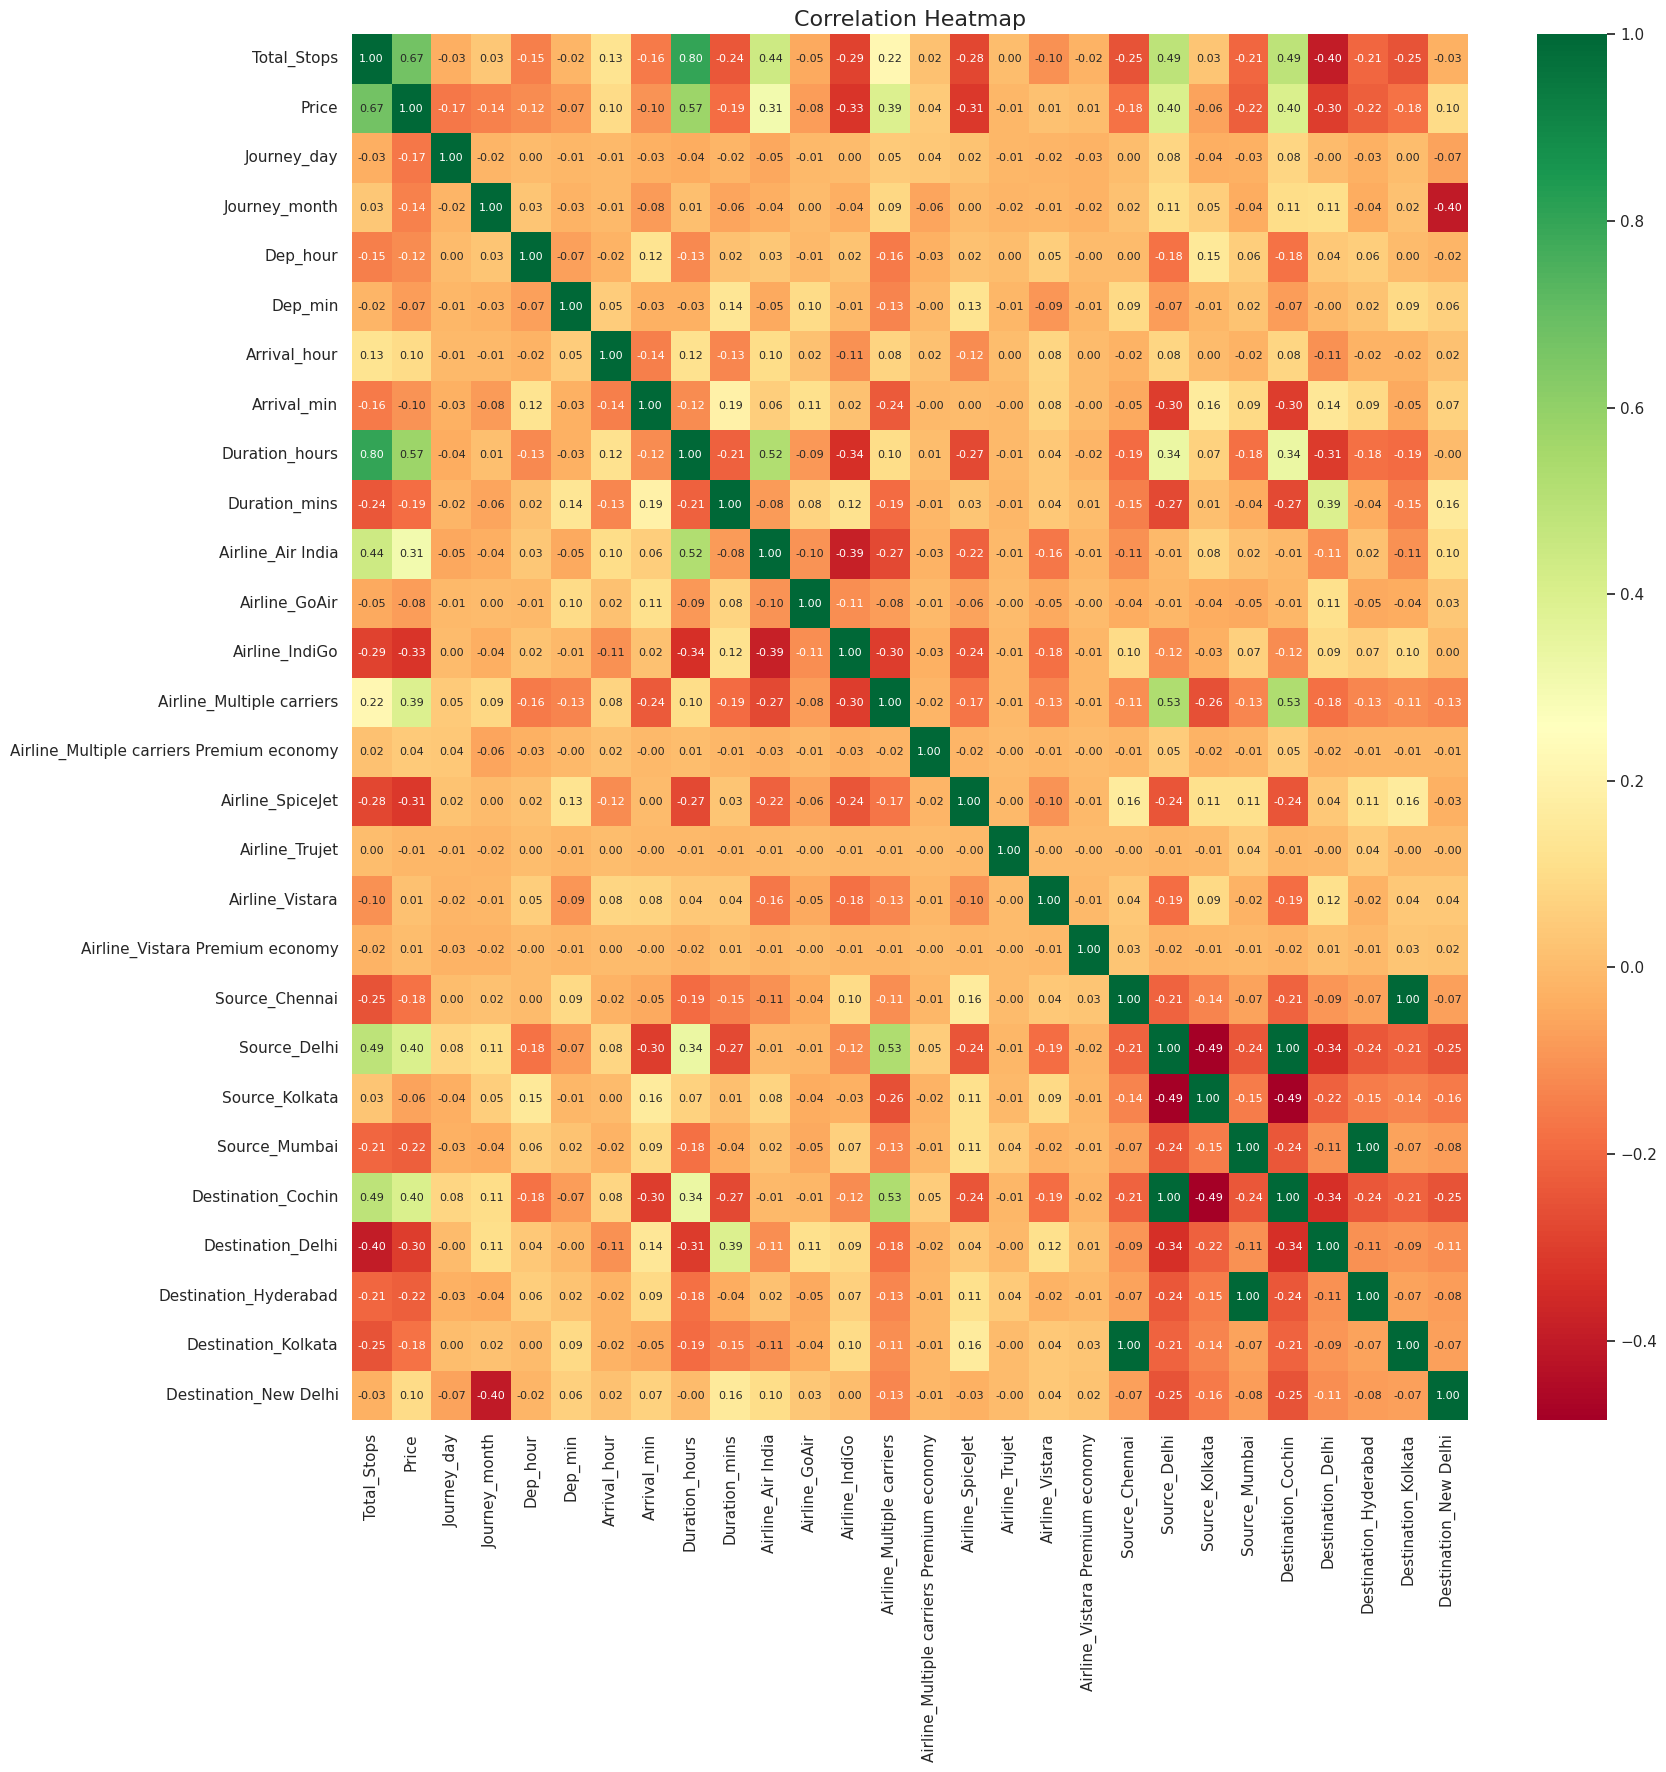

In [55]:
# Finds correlation between independent and dependent attributes
plt.figure(figsize=(18, 18))
heatmap = sns.heatmap(data_train.corr(), annot=True, fmt=".2f", cmap="RdYlGn", annot_kws={"size": 8})
heatmap.set_title("Correlation Heatmap", fontsize=16)
plt.show()

### ***Method 2: Feature Importance using ExtraTreesRegressor***

In [56]:
# Fit ExtraTreesRegressor for feature importance
from sklearn.ensemble import ExtraTreesRegressor

# Fit ExtraTreesRegressor model to determine feature importance
selection = ExtraTreesRegressor()
selection.fit(X, y)

# Display feature importances
print("Feature Importances:")
print(selection.feature_importances_)

Feature Importances:
[3.62479510e-01 4.65883070e-02 4.29450168e-02 3.60277265e-02
 4.52911399e-02 1.52770024e-01 3.56989454e-02 4.15211858e-02
 4.43605415e-03 2.37309076e-02 6.44223543e-02 2.21831211e-03
 7.36236365e-03 1.78967629e-04 1.36834790e-02 3.57823315e-04
 6.88177090e-04 3.48581285e-02 4.94337918e-03 6.26506981e-03
 3.59719399e-02 1.91546178e-03 6.51665739e-03 6.01728570e-04
 2.85273410e-02]


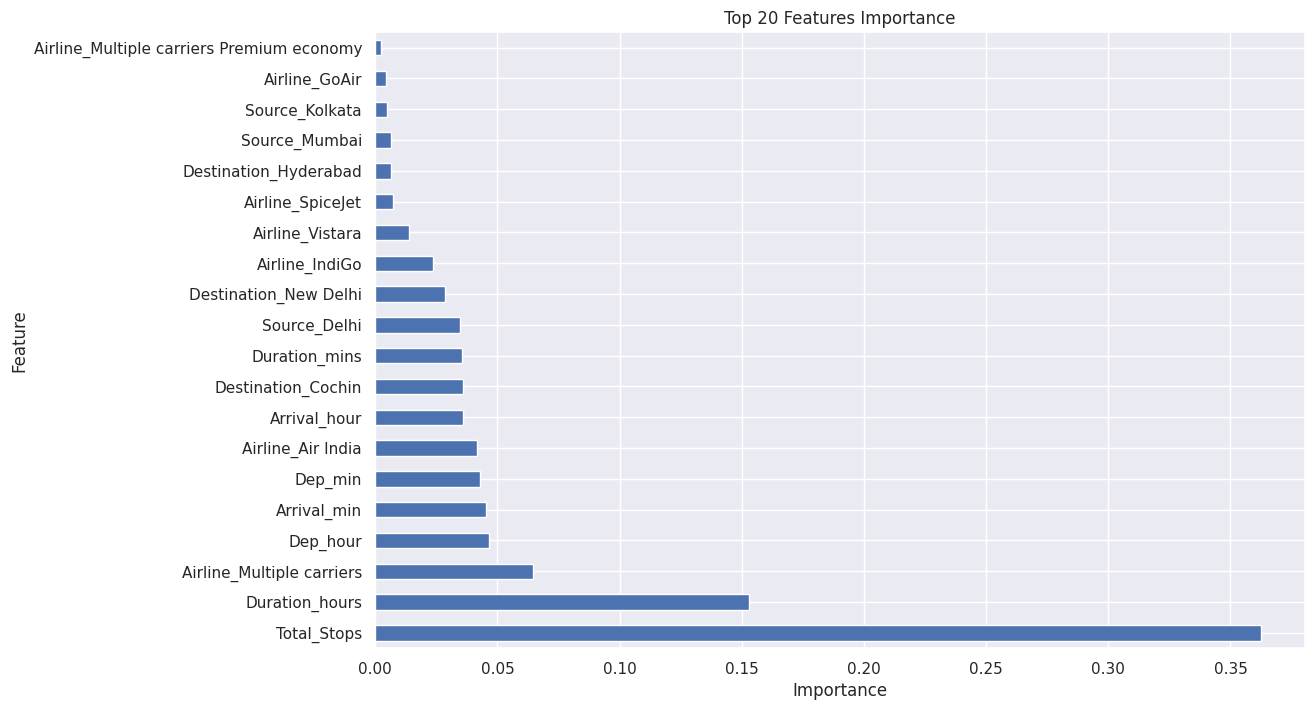

In [57]:
# Section: Plotting Graph of Feature Importances for Better Visualization
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 Features Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### **Observations**:
> The code focuses on feature selection methods, including a heatmap, feature_importance_, and SelectKBest.

> Selected features for analysis include various attributes such as Total_Stops, Departure and Arrival times, Duration, Airline, Source, and Destination.

> The heatmap provides a visual representation of the correlation between independent and dependent attributes.

> Feature importances are determined using the ExtraTreesRegressor model, and a bar plot is generated to visualize the top 20 important features.

## **Fitting Model using Random Forest**

---
## Algorithm: Model Fitting and Evaluation using Random Forest

1. **Splitting the Dataset:** Divide the dataset into training and testing sets to facilitate predictions with respect to `X_test`. Use the `train_test_split` function.

2. **Data Scaling (Optional):** If necessary, perform data scaling. Note that scaling is typically not required for Random Forest models.

3. **Importing the Model:** Import the Random Forest Regressor model from the appropriate library.

4. **Fitting the Data:** Create an instance of the Random Forest Regressor and fit the model using the training data (`X_train` and `y_train`).

5. **Prediction:** Use the fitted model to make predictions with respect to `X_test`.

6. **Regression Evaluation - RSME Score:** Assess the model's performance in regression tasks by calculating the Root Mean Squared Error (RSME) score. This metric provides a measure of the model's accuracy in predicting numerical values.

7. **Visualization:** Plot relevant graphs to visualize the distribution of residuals or other aspects that aid in understanding the model's performance.


In [58]:
 # Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Fitting

In [59]:
# Creating and fitting the Random Forest Regressor model
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

### Prediction

In [60]:
# Predicting with respect to X_test
y_pred = reg_rf.predict(X_test)

### Model Evaluation

In [61]:
# Checking the model's performance on both training and testing sets
print("Training Set Score (R^2):", reg_rf.score(X_train, y_train))
print("Testing Set Score (R^2):", reg_rf.score(X_test, y_test))

Training Set Score (R^2): 0.8055783376602225
Testing Set Score (R^2): 0.6744694472572876


### Visualization of Prediction Residuals

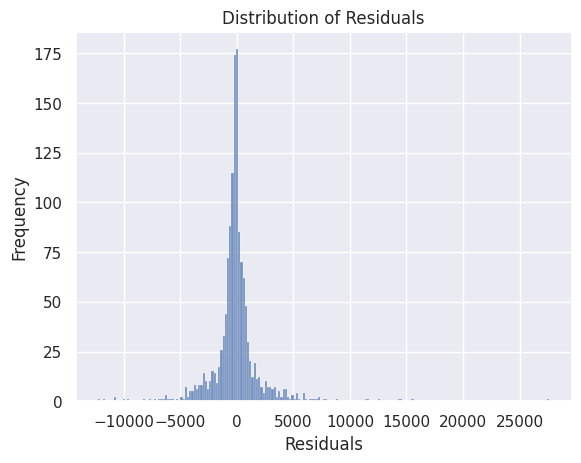

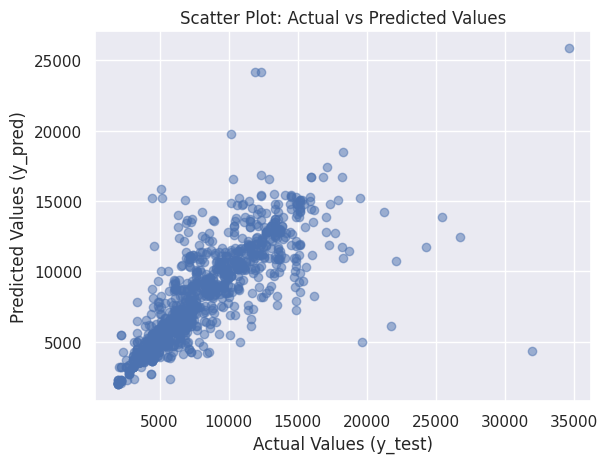

In [62]:
# Plotting the distribution of residuals
sns.histplot(y_test - y_pred)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot: Actual vs Predicted Values")
plt.show()

### Model Performance Metrics

In [63]:
# Calculating various performance metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error (MAE): 1170.9819772462833
Mean Squared Error (MSE): 4795199.847383491
Root Mean Squared Error (RMSE): 2189.794476060137


In [64]:
# Normalized RMSE
normalized_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / (max(y) - min(y))
print('Normalized RMSE:', normalized_rmse)

Normalized RMSE: 0.06216768328583174


### R^2 Score

In [65]:
# Calculating the R^2 score
r2_score = metrics.r2_score(y_test, y_pred)
print('R^2 Score:', r2_score)

R^2 Score: 0.6744694472572876



# Hyperparameter Tuning
1. Choose following method for hyperparameter tuning
       GridSearchCV  --> Fast
       RandomizedSearchCV
2. Assign hyperparameters in form of dictionery
3. Fit the model
4. Check best paramters and best score



## **Hyperparameter Tuning using RandomizedSearchCV**

In [66]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Defining Hyperparameters for RandomizedSearchCV

### Performing RandomizedSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=reg_rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2
)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_sa

### Best Parameters and Best Score

In [69]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print Best Parameters and Best Score
print('Best Parameters:', best_params)
print('Best Score:', best_score)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: -4845072.890842548


### Prediction with Best Parameters

In [70]:
# Use the best hyperparameters to train the model
best_reg_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

best_reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=300)

In [71]:
# Predict using the tuned model
y_pred_tuned = best_reg_rf.predict(X_test)
y_pred_tuned

array([9941.21401205, 2780.21870824, 8251.86496992, ..., 5784.74955289,
       2294.81617726, 8310.15416152])

### Visualization of Predictions

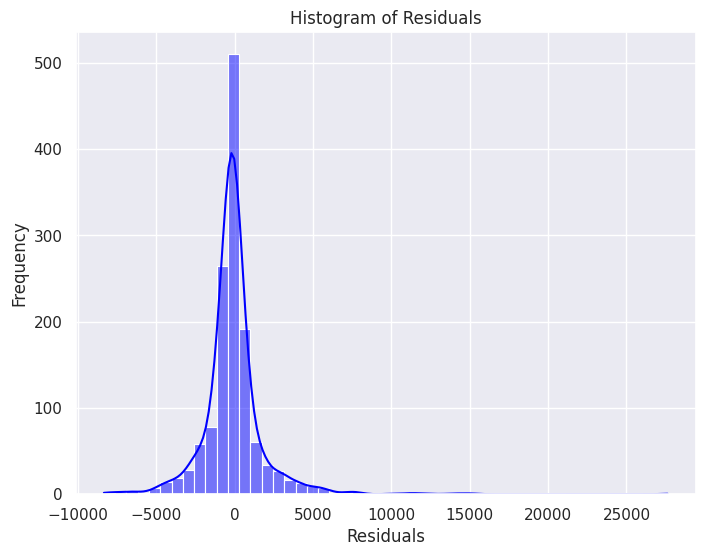

In [72]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred_tuned, bins=50, kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

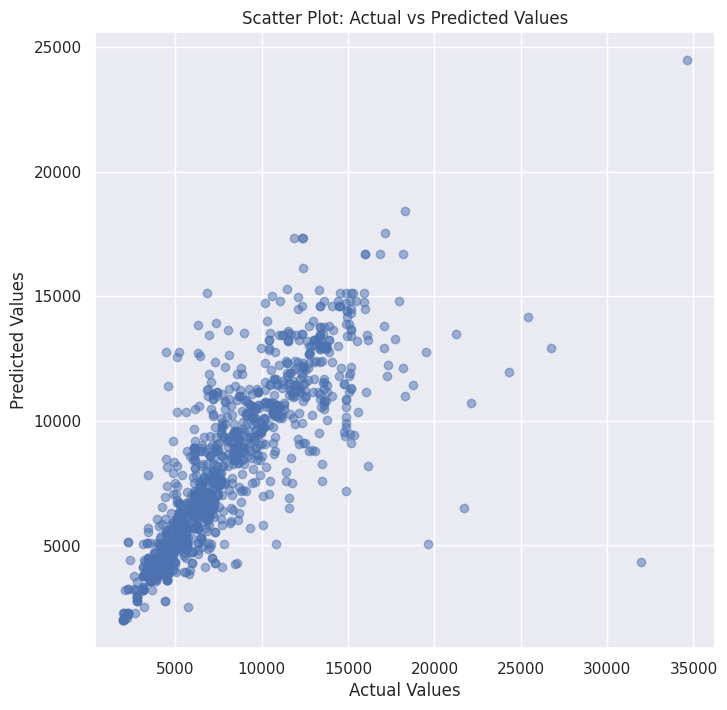

In [73]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.title('Scatter Plot: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Model Performance Metrics with Best Parameters


In [74]:
# Model Performance Metrics with Best Parameters
mae_tuned = metrics.mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = metrics.mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = metrics.r2_score(y_test, y_pred_tuned)

print('Tuned Model Performance:')
print('Tuned Mean Absolute Error (MAE):', mae_tuned)
print('Tuned Mean Squared Error (MSE):', mse_tuned)
print('Tuned Root Mean Squared Error (RMSE):', rmse_tuned)
print(r2_tuned)

Tuned Model Performance:
1147.1038410577148
4308374.146706901
2075.6623392803804
0.7075184638727435


## Save the Model using Pickle

In [75]:
# Import necessary libraries
import pickle
from sklearn import metrics

### Save the Model to a File

In [76]:
with open('flight_rf_tuned.pkl', 'wb') as file:
    pickle.dump(best_reg_rf, file)

### Load the Model and Make Predictions

In [77]:
# Open the saved model file for reading
with open('flight_rf_tuned.pkl', 'rb') as model:
    loaded_rf_model = pickle.load(model)

# Use the loaded model to make predictions on the test set
y_pred_loaded = loaded_rf_model.predict(X_test)

### Model Evaluation using R^2 Score


In [78]:
# Calculate and display the R^2 score to assess model performance
r2_loaded = metrics.r2_score(y_test, y_pred_loaded)
print("R^2 Score:", r2_loaded*100)

R^2 Score: 70.75184638727436
